In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.preprocessing import MinMaxScaler,StandardScaler,normalize
from sklearn import metrics
%matplotlib inline

In [2]:
df_wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv",sep=";")

In [3]:
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [5]:
df_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
df_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [7]:
y = df_wine["quality"]
X = df_wine.iloc[:, :-1]

In [8]:
print(X.shape)
print(y.shape)
print(type(X))
print(type(y))

(4898, 11)
(4898,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [9]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


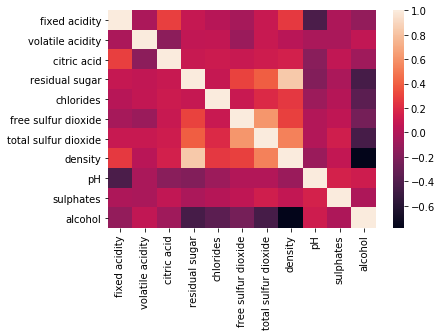

In [10]:
## find co-relation
sns.heatmap(X.corr())

We can see there are correlation between "density" and "residual sugar". Also corelation between "free sulfur dioxide" and "total sulfur dioxide"
We will delete one column later to reverfy the accuracy

In [11]:
## do scaling-- ue min-max Scaler
X_scale =  MinMaxScaler().fit_transform(X.values)

In [12]:
pd.DataFrame(X_scale).describe()

,0,1,2,3,4,5,6,7,8,9,10
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,0.293730,0.194354,0.201320,0.088825,0.109117,0.116056,0.300141,0.133360,0.425697,0.313775,0.405527
std,0.081141,0.098818,0.072903,0.077792,0.064831,0.059258,0.098603,0.057662,0.137273,0.132704,0.198487
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.240385,0.127451,0.162651,0.016871,0.080119,0.073171,0.229698,0.088924,0.336364,0.220930,0.241935
50%,0.288462,0.176471,0.192771,0.070552,0.100890,0.111498,0.290023,0.127820,0.418182,0.290698,0.387097
75%,0.336538,0.235294,0.234940,0.142638,0.121662,0.153310,0.366589,0.173318,0.509091,0.383721,0.548387
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
df_wine["quality"].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [14]:
## As we can see that dependent variable "quality" have value between 3 to 9
## We will scale our independent variables min=1 and max=10
bins = np.linspace(0,1,10)
X_digitized = np.digitize(X_scale,bins)

In [15]:
col_name = list(pd.DataFrame(X))

In [16]:
pd.DataFrame(X_digitized,columns=col_name).describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,3.136382,2.249898,2.304206,1.413230,1.436505,1.551245,3.204165,1.668844,4.335647,3.299918,4.172928
std,0.791895,0.957769,0.702795,0.628703,0.711175,0.599100,0.924982,0.603385,1.270468,1.223320,1.763337
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,2.000000,2.000000,1.000000,1.000000,1.000000,3.000000,1.000000,4.000000,2.000000,3.000000
50%,3.000000,2.000000,2.000000,1.000000,1.000000,2.000000,3.000000,2.000000,4.000000,3.000000,4.000000
75%,4.000000,3.000000,3.000000,2.000000,2.000000,2.000000,4.000000,2.000000,5.000000,4.000000,5.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,9.000000,10.000000,10.000000,10.000000,10.000000


### Take kernel "rbf"
To provide a consistent interface with other classifiers, the decision_function_shape option 
allows to monotically transform the results of the “one-against-one” classifiers to a decision function of shape (n_samples, n_classes).
A classification task with more than two classes; e.g., classify a set of images of fruits which may be oranges, apples, or pears. Multi-class classification makes the assumption that each sample is assigned to one and only one label(“one-against-one”): a fruit can be either an apple or a pear but not both at the same time.

In [17]:
clf_svm = svm.SVC(kernel='rbf',decision_function_shape="ovo")  ## take default parameter
clf_svm.fit(X_digitized,y)
#clf.fit(X=digitized,y=label.values)  

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [18]:
y_predict = clf_svm.predict(X_digitized)

In [19]:
y_predict

array([6, 5, 6, ..., 5, 6, 6], dtype=int64)

SVMs decision function depends on some subset of the training data, called the support vectors. Some properties of these support vectors can be found in members support_vectors_, support_ and n_support:

In [20]:
## Get support vectors
clf_svm.support_vectors_

array([[5., 2., 2., ..., 3., 3., 3.],
       [2., 2., 3., ..., 7., 3., 6.],
       [5., 5., 3., ..., 5., 2., 1.],
       ...,
       [4., 2., 2., ..., 5., 3., 7.],
       [3., 3., 2., ..., 5., 2., 7.],
       [3., 2., 3., ..., 6., 3., 8.]])

In [21]:
## Get indicies of support vectors
clf_svm.support_

array([ 251,  253,  294, ...,  827,  876, 1605])

In [22]:
clf_svm.classes_

array([3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [23]:
## Get No of support venctors of each class
print(clf_svm.n_support_)

[  20  163 1289 1937  864  175    5]


In [24]:
print("Output count of support vectors corresponds to classes\n",list(zip(clf_svm.classes_,clf_svm.n_support_)))

Output count of support vectors corresponds to classes
 [(3, 20), (4, 163), (5, 1289), (6, 1937), (7, 864), (8, 175), (9, 5)]


In [25]:
df_wine.groupby("quality").size()

quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
dtype: int64

In [26]:
conf_matrix = metrics.confusion_matrix(y,y_predict)
conf_matrix

array([[   1,    0,    7,   12,    0,    0,    0],
       [   0,    4,   90,   67,    2,    0,    0],
       [   0,    0,  810,  643,    4,    0,    0],
       [   0,    0,  355, 1765,   78,    0,    0],
       [   0,    0,   27,  685,  168,    0,    0],
       [   0,    0,    7,  130,   38,    0,    0],
       [   0,    0,    0,    2,    3,    0,    0]], dtype=int64)

In [27]:
score_svm = cross_val_score(clf_svm,X_digitized,y,cv= 5)
print("Cross Validation score : " + str(score_svm))
print("Cross Validation Mean score : " + str(score_svm.mean()))

Cross Validation score : [0.48673469 0.49693878 0.51836735 0.51072523 0.5505618 ]
Cross Validation Mean score : 0.5126655687811386


In [28]:
svm_accuracy = metrics.accuracy_score(y,y_predict)
print("SVM Accuracy :" + str(svm_accuracy))

SVM Accuracy :0.5610453246222948


In [29]:
clf_svm.support_vectors_

array([[5., 2., 2., ..., 3., 3., 3.],
       [2., 2., 3., ..., 7., 3., 6.],
       [5., 5., 3., ..., 5., 2., 1.],
       ...,
       [4., 2., 2., ..., 5., 3., 7.],
       [3., 3., 2., ..., 5., 2., 7.],
       [3., 2., 3., ..., 6., 3., 8.]])

In [30]:
clf_svm.support_

array([ 251,  253,  294, ...,  827,  876, 1605])

In [31]:
clf_svm.classes_

array([3, 4, 5, 6, 7, 8, 9], dtype=int64)

### Let's try with polynomial kernel

In [32]:

clf_svm_poly = svm.SVC(kernel='poly',decision_function_shape="ovo")
clf_svm_poly.fit(X_digitized,y)  

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [33]:
y_predict_poly = clf_svm_poly.predict(X_digitized)

In [34]:
conf_matrix_poly = metrics.confusion_matrix(y,y_predict_poly)
conf_matrix_poly

array([[   6,    0,    5,    9,    0,    0,    0],
       [   1,   14,   77,   70,    1,    0,    0],
       [   0,    1,  749,  700,    7,    0,    0],
       [   0,    1,  347, 1769,   81,    0,    0],
       [   0,    0,   31,  679,  170,    0,    0],
       [   0,    0,    7,  129,   39,    0,    0],
       [   0,    0,    0,    2,    3,    0,    0]], dtype=int64)

In [35]:
svm_accuracy_poly = clf_svm_poly.score(X_digitized,y)
print("SVM Accuracy Polynomial Model : ",svm_accuracy_poly)

SVM Accuracy Polynomial Model :  0.5528787260106166


In [36]:
clf_svm_poly.classes_

array([3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [37]:
print(clf_svm_poly.support_vectors_)

[[5. 2. 2. ... 3. 3. 3.]
 [2. 2. 3. ... 7. 3. 6.]
 [5. 5. 3. ... 5. 2. 1.]
 ...
 [4. 2. 2. ... 5. 3. 7.]
 [3. 3. 2. ... 5. 2. 7.]
 [3. 2. 3. ... 6. 3. 8.]]


In [38]:
print(clf_svm_poly.support_)

[ 251  253  294 ...  827  876 1605]


In [39]:
score_svm_poly = cross_val_score(clf_svm_poly,X_digitized,y, cv=5)
print("Cross Validation score : " + str(score_svm_poly))
print("Cross Validation Mean score : " + str(score_svm_poly.mean()))

Cross Validation score : [0.4744898  0.50102041 0.5255102  0.51072523 0.53115424]
Cross Validation Mean score : 0.5085799754018053


### Let's try with Linear SVM Classifier
On the other hand, LinearSVC implements “one-vs-the-rest” multi-class strategy,
LinearSVC also implements an alternative multi-class strategy, the so-called multi-class SVM formulated by Crammer and Singer, by using the option multi_class='crammer_singer'. This method is consistent, which is not true for one-vs-rest classification. In practice, one-vs-rest classification is usually preferred, since the results are mostly similar, but the runtime is significantly less.


In [40]:
clf_svm_linear = svm.LinearSVC(random_state=42,multi_class="ovr")
clf_svm_linear.fit(X_scale,y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
          verbose=0)

In [41]:
y_predict_linear = clf_svm_linear.predict(X_scale)

In [42]:
y_predict_linear

array([6, 5, 6, ..., 5, 6, 6], dtype=int64)

In [43]:
svm_accuracy_linear = clf_svm_linear.score(X_scale,y)
print("SVM Accuracy Linear Model : ",svm_accuracy_linear)

SVM Accuracy Linear Model :  0.5306247447937934


In [44]:
score_svm_linear = cross_val_score(clf_svm_linear,X_scale,y, cv=5)
print("Cross Validation score : " + str(score_svm_linear))
print("Cross Validation Mean score : " + str(score_svm_linear.mean()))

Cross Validation score : [0.46530612 0.50408163 0.55       0.52808989 0.55158325]
Cross Validation Mean score : 0.5198121781909903


In [45]:
clf_svm_linear.classes_

array([3, 4, 5, 6, 7, 8, 9], dtype=int64)

For “one-vs-rest” LinearSVC the attributes coef_ and intercept_ have the shape [n_class, n_features] and [n_class] respectively. Each row of the coefficients corresponds to one of the n_class many “one-vs-rest” classifiers and similar for the intercepts, in the order of the “one” class.

In [46]:
print(clf_svm_linear.coef_.shape)
print(clf_svm_linear.intercept_.shape)

(7, 11)
(7,)


In [47]:
print(clf_svm_linear.coef_)
print(clf_svm_linear.intercept_)

[[ 2.47726088e-01  9.52204744e-02 -5.96888328e-02 -8.51136791e-02
   6.50968269e-02  3.19221276e-01  2.38433191e-02 -1.41173238e-02
   6.02797847e-02 -4.16968952e-02  7.84565632e-03]
 [ 2.75756562e-01  9.20760572e-01 -1.35448654e-01 -1.13837974e+00
  -6.47827307e-02 -9.01973113e-01 -2.97450597e-01  1.11115793e+00
   2.20603153e-02 -7.79761476e-02 -2.72059882e-01]
 [-1.43467807e-01  1.62538738e+00  2.00731107e-01 -1.59946572e+00
   9.71442542e-02 -8.40035069e-01  6.24694645e-01  9.67839924e-01
  -3.18042715e-01 -4.08780209e-01 -1.84834180e+00]
 [-4.57222993e-01 -1.70541994e+00  8.99812797e-02  2.09980473e-01
   1.64426829e-01  1.10710512e-01 -5.70449895e-02  1.07791066e+00
  -1.63593272e-01  3.20557362e-02  5.70797360e-01]
 [ 3.60748183e-01 -9.20842021e-01 -2.93456344e-01  1.91450510e+00
  -1.21996932e+00  5.34598935e-01 -1.56497763e-01 -2.66177521e+00
   3.86408626e-01  4.27050429e-01  9.70716803e-01]
 [ 3.73195853e-02 -1.10885025e-01 -1.62343491e-03  7.26828327e-01
   7.07316883e-03  

### Using Linear Kernel

In [48]:
clf_svm_linear_kernel = svm.SVC(kernel="linear",random_state=42,decision_function_shape="ovo")
clf_svm_linear_kernel.fit(X_digitized,y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [49]:
y_predict_linear_kernel = clf_svm_linear_kernel.predict(X_digitized)

In [50]:
svm_accuracy_linear_kernel = clf_svm_linear_kernel.score(X_digitized,y)
print("SVM Accuracy Linear Kernel Model : ",svm_accuracy_linear_kernel)

SVM Accuracy Linear Kernel Model :  0.5202123315639037


In [51]:
score_svm_linear_kernel = cross_val_score(clf_svm_linear,X_scale,y, cv=5)
print("Cross Validation score : " + str(score_svm_linear_kernel))
print("Cross Validation Mean score : " + str(score_svm_linear_kernel.mean()))

Cross Validation score : [0.46530612 0.50408163 0.55       0.52808989 0.55158325]
Cross Validation Mean score : 0.5198121781909903


### Plot different SVM classifiers in the iris dataset
https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html#sphx-glr-auto-examples-svm-plot-iris-svc-py

### Tuning the hyper-parameters of an estimator
https://scikit-learn.org/stable/modules/grid_search.html#grid-search

### Cross-validation: evaluating estimator performance
https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation

In [52]:
#### Check the imbalanced data in depndent variable (multi class varaible-- we have 7 classes of "quality")
df_wine.quality.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [53]:
## Check the data ratio to verify the unbalanced in column "quality"
df_wine.quality.value_counts(normalize=True) * 100

6    44.875459
5    29.746835
7    17.966517
8     3.572887
4     3.327889
3     0.408330
9     0.102082
Name: quality, dtype: float64

In [54]:
## Or use this to check ratio
(df_wine.quality.value_counts()/df_wine.quality.count())*100

6    44.875459
5    29.746835
7    17.966517
8     3.572887
4     3.327889
3     0.408330
9     0.102082
Name: quality, dtype: float64

In [55]:
### Or use this
(df_wine.groupby("quality").size()/df_wine["quality"].count())*100

quality
3     0.408330
4     3.327889
5    29.746835
6    44.875459
7    17.966517
8     3.572887
9     0.102082
dtype: float64

We can clealy observer that classses are very unbalanced

We can use SMOTE to resolve unbalanced dataset but for this we need some good amoint of minority classes data
but we have very very less data for class 3,9,4 and 8.

Let use some another method.

Since classes are imbalanced, what about providing some bias to minority classes ? We can estimate class weights in scikit_learn by using compute_class_weight and use the parameter ‘class_weight’, while training the model. This can help to provide some bias towards the minority classes while training the model and thus help in improving performance of the model while classifying various classes.We will try to use Grid search to get best value of parameters

##### Apply Grid Search

In [66]:
parameter =  {'kernel':['linear', 'rbf', 'poly', 'sigmoid'],
              'C':[0.1, 1.0, 10.0, 100.0, 1000.0],
              'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
              'class_weight': [{3:9}, 'balanced']}

In [67]:
##Lets use polynomial classifer estimator --- clf_svm_poly

In [68]:
G_SVM = GridSearchCV(clf_svm_poly, parameter, cv=5,scoring="accuracy",)
G_SVM.fit(X_scale, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovo', degree=3,
                           gamma='scale', kernel='poly', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0,
                               1000.0],
                         'class_weight': [{3: 9}, 'balanced'],
                         'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [70]:
G_SVM.best_score_

0.5334898167642951

In [71]:
G_SVM.best_params_

{'C': 100.0, 'class_weight': {3: 9}, 'gamma': 0.5, 'kernel': 'rbf'}

We can see that best accuracy that we get using Grid Search is 53%.

In Next SVM module we will apply different ML algorithms and will try to use some feature creation so that we can 
increase the accuracy.